# Data Cleaning and Preprocessing

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [61]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking shape of the data

In [62]:
print('Number of Column: ', df.shape[1])
print('Number of Rows: ', df.shape[0])

Number of Column:  12
Number of Rows:  891


### Checking the data type of the data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking about missing values

In [64]:
df_null = df.isnull().sum()/df.shape[0]*100
df_null

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Age, Cabin, Embarked has missing values.
* Cabin has 77% missing values therefore we have to remove the column from data.

In [65]:
# Droping the column Cabin
df.drop(columns = 'Cabin', inplace = True)

In [66]:
# Droping passenge id and ticket also
df.drop(columns = ['PassengerId','Ticket'], inplace = True )

In [67]:
df.drop(columns = 'Name', inplace = True)

In [68]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

* column Cabin, passenger id, name and ticket was dropped

### Checking the duplicates from the data

In [69]:
df_duplicate = df.duplicated()
df_duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

* There is no any duplicate data.

### Handling missing data

In [70]:
# mean immputation for age and mode imputation for empbarked
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [71]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [72]:
df_null = df.isnull().sum()/df.shape[0]*100
df_null

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

* missing values has filled

### Checking for Outliers

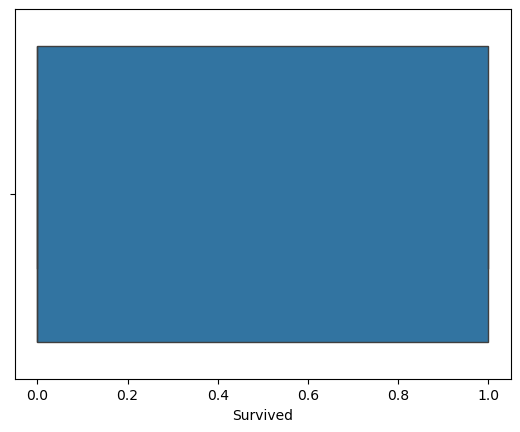

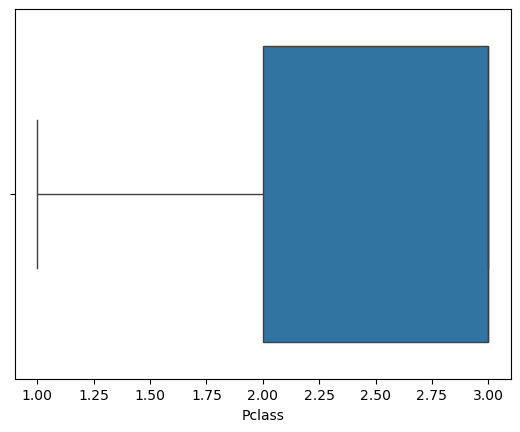

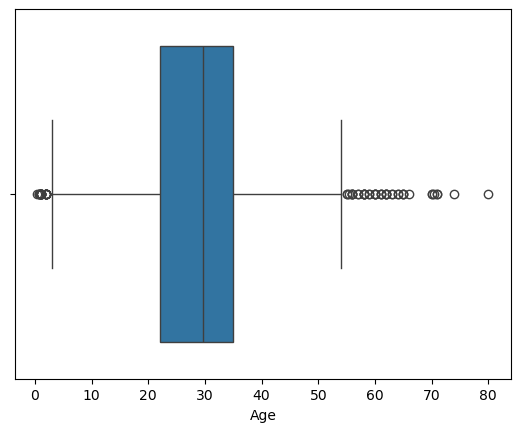

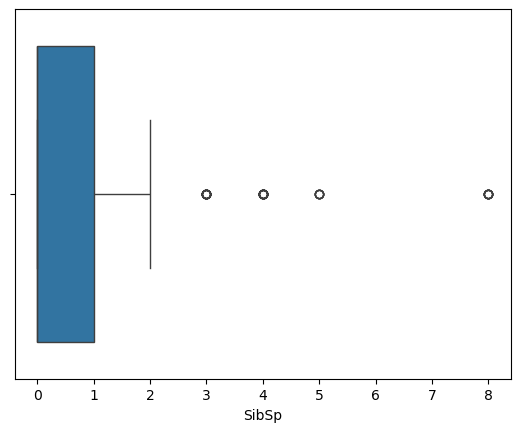

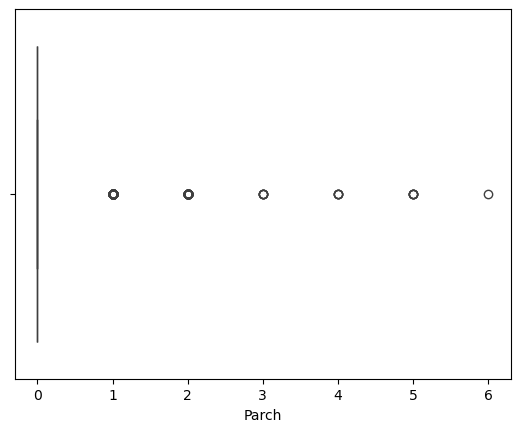

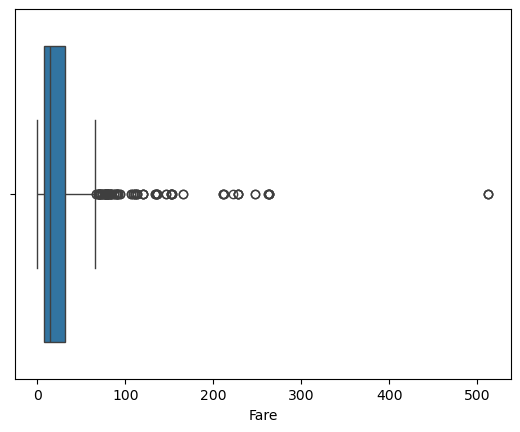

In [73]:
for i in df.select_dtypes(include = np.number).columns:
    sns.boxplot(x = df[i])
    plt.show()

* Age, Sibling/Spous, parant/child and fare has some outliers

### Outlier Treatment

In [74]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr


In [75]:
df['Age'] = df['Age'].apply(lambda x:ll if x<ll else ul if x>ul else x)

In [76]:
df['SibSp'] = df['SibSp'].apply(lambda x:ll if x<ll else ul if x>ul else x)

In [77]:
df['Parch'] = df['Parch'].apply(lambda x:ll if x<ll else ul if x>ul else x)

In [78]:
df['Fare'] = df['Fare'].apply(lambda x:ll if x<ll else ul if x>ul else x)

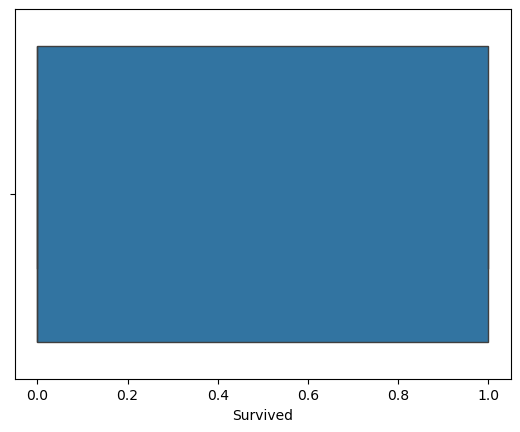

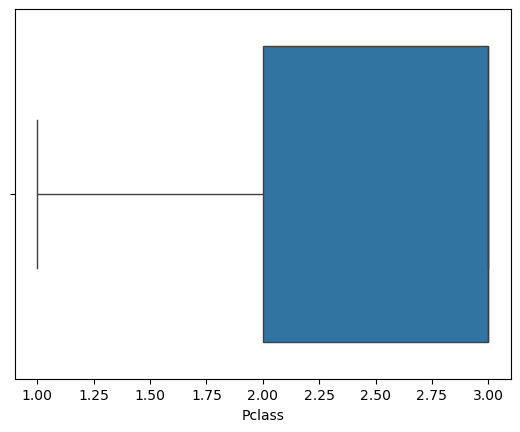

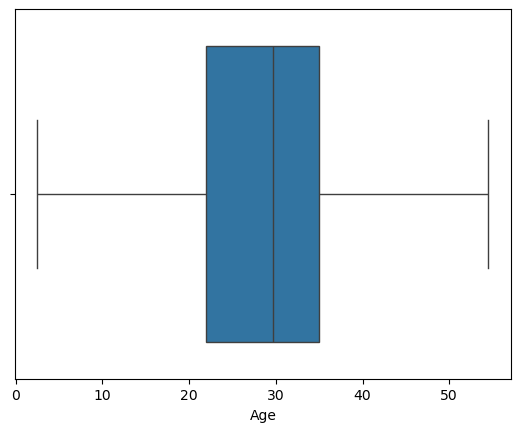

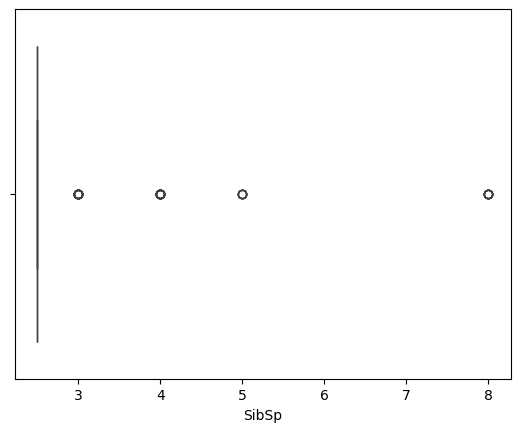

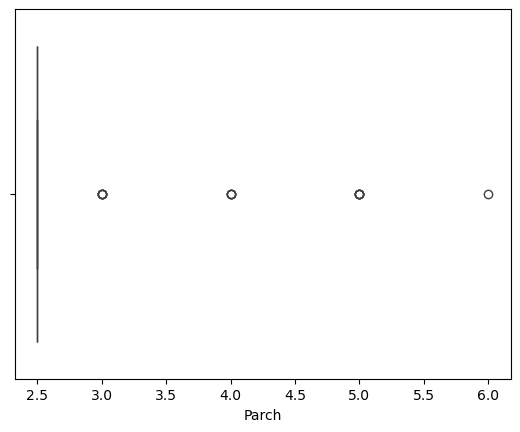

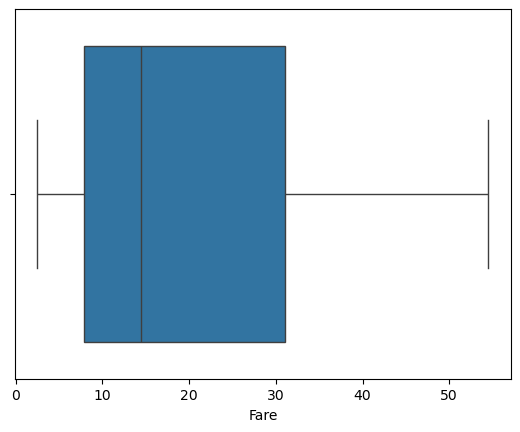

In [79]:
for i in df.select_dtypes(include = np.number).columns:
    sns.boxplot(x = df[i])
    plt.show()

* Outlier are treated

### Encoding for converting categorical to numerical features

In [80]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [81]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [82]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [84]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,2.5,2.5,7.250,0
1,1,1,0,38.0,2.5,2.5,54.500,1
2,1,3,0,26.0,2.5,2.5,7.925,0
3,1,1,0,35.0,2.5,2.5,53.100,0
4,0,3,1,35.0,2.5,2.5,8.050,0


### Checking the normal distribution usig histogram

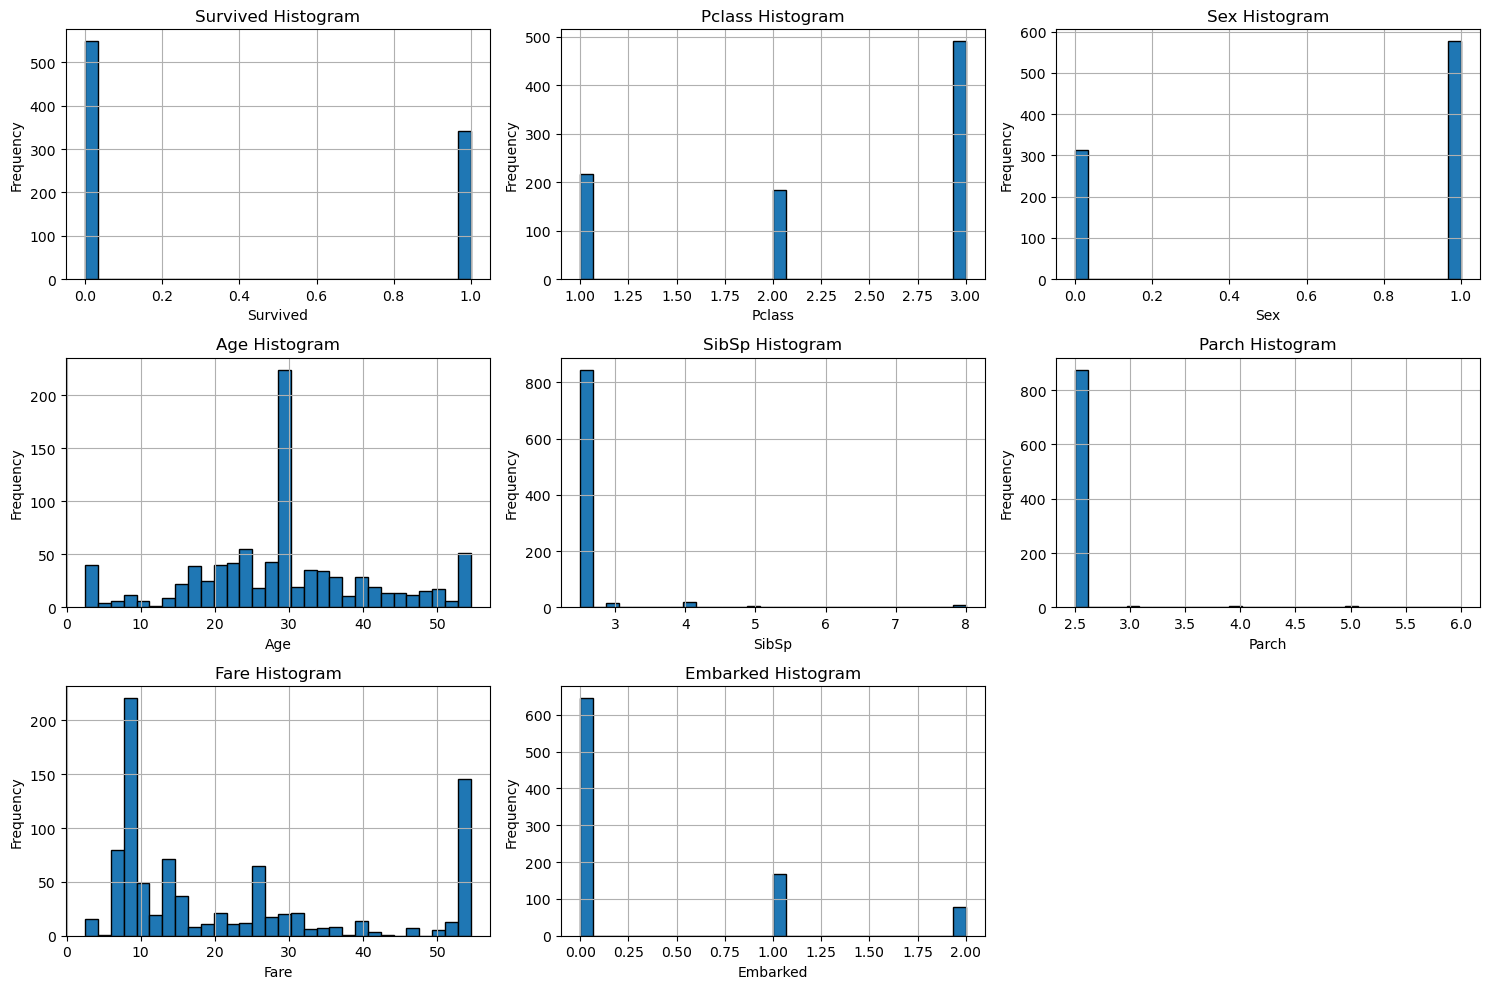

In [96]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the layout
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust rows & columns based on number of features
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Checking data Normality using Shapiro wilk test

In [87]:
from scipy.stats import shapiro

stat, p = shapiro(df['Age'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 7.352033376897566e-15
Not Gaussian


In [89]:
stat, p = shapiro(df['Survived'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 1.7945308393836472e-40
Not Gaussian


In [90]:
stat, p = shapiro(df['Pclass'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 3.3958319924210316e-36
Not Gaussian


In [91]:
stat, p = shapiro(df['Sex'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 6.201446353869478e-41
Not Gaussian


In [92]:
stat, p = shapiro(df['SibSp'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 0.0
Not Gaussian


In [93]:
stat, p = shapiro(df['Parch'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 0.0
Not Gaussian


In [94]:
stat, p = shapiro(df['Fare'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 1.0431132333179936e-31
Not Gaussian


In [95]:
stat, p = shapiro(df['Embarked'].dropna())
print('Shapiro-Wilk Test p-value:', p)

if p > 0.05:
    print("Likely Gaussian (normal distribution)")
else:
    print("Not Gaussian")

Shapiro-Wilk Test p-value: 3.6295031524477087e-41
Not Gaussian


### Using normalization for equal magnitude

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [98]:
# Check the result
print(df[numerical_cols].describe())

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    0.654321    0.647587    0.516862    0.017549    0.007856   
std      0.486592    0.418036    0.477990    0.231962    0.101836    0.069773   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.500000    0.000000    0.375000    0.000000    0.000000   
50%      0.000000    1.000000    1.000000    0.523060    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.625000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean     0.385323    0.180696  
std      0.335231    0.317837  
min      0.000000    0.000000  
25%      0.104046    0.000000  
50%      0.229888    0.000000  
75%      0.548077    0.500000  
max      1.000